## Beispiel: Logarithmisches Dekrement 

Das in @fig-ems_rahmen_1 dargestellte System zeigt ein Rahmentragwerk. Dieses wird anhand eines Einmassenschwingers approximiert.

![Am Riegel ausgelenktes System](bilder/ems_rahmen_1.png){#fig-ems_rahmen_1 width=60%}

Gesucht:

- Laterale bzw. horizontale Steifigkeit $k$ des Rahmens
- Die Dämpfungsrate $\zeta$ und die Dämpfungskonstante $c$
- Die Amplitude der Auslenkung des Rahmens nach 10 Schwingzyklen

Gegeben:

- Dehnsteifigkeit der Stützen und des Riegels $EA = \infty$
- Biegesteifigkeit des Riegels $EI = \infty$
- Gesamtmasse $M = 1941 kg$

Um die Systemeigenschaften des Riegels zu untersuchen, wird 
eine Kopfverschiebung bzw. Auslenkung des Rahmens von $u = 20\text{mm}$ aufgebracht. Danach wird die Halterung schlagartig gelöst und der Rahmen kann frei schwingen. Die angebrachte Messeinrichtung registriert eine max. Kopfverschiebung nach dem ersten Zurückschwingen von $u = 15\text{mm}$ nach $T = 0.2 \text{s}$. 


{{< pagebreak >}}

### Musterlösung{#sec-ml_log_dek}
Das Verhalten des Systems in @fig-ems_rahmen_1 wird versucht mittels der Theorie des Einmassenschwingers zu ermitteln. Es handelt sich um eine gedämpfte freie Schwingung.

In [1]:
import sympy as sp 
from sympycalcs import render, convert
import sympy.physics.units as unit
from sympy.abc import *

sp.init_printing(use_latex='mathjax', latex_mode='equation*')

In [2]:
EA_riegel, EI_riegel,EA_stuetze, EI_stuetze, k, m, u, c, T_D, zeta, H, u_0, u_1 = sp.symbols('EA_riegel, EI_riegel,EA_stuetze, EI_stuetze, k, m, u, c,T_D, zeta H u_0 u_1')

In [3]:
params = {'EA_riegel':sp.oo,
          'EI_riegel':sp.oo,
          'EA_stuetze':sp.oo,
          'm':1941*unit.N*unit.second**2/unit.m,
          'u_0':20*unit.mm,
          'u_1':15*unit.mm,
          'T_D':0.2*unit.second}

# render.dict_render(params)

#### Horizontale Steifigkeit

##### Logarithmisches Dekrement

Da keine Angaben über die Profile der Stützen gemacht werden, kann mittels des logarithmischen Dekrements die Eigenkreisfrequenz bestimmt werden. Anhand der Eigenkreisfrequenz lässt sich die Steifigkeit ableiten.


![Beispiel eines logarithmischen Dekrements](bilder/3-3_log_Dekrement.svg){#fig-log_dek}

In [4]:
delta = sp.ln(u_0 / u_1)
zeta = delta/ (2*sp.pi)
render.eq_display('delta', delta,
                  'delta', delta.subs(params).evalf(3))

       ⎛u₀⎞
δ = log⎜──⎟
       ⎝u₁⎠

δ = 0.288

##### Dämpfungsrate

Anhand des logarithmischen Dekrements kann die Dämpfungsrate bestimmt werden.

![Dämpfungsrate anhand des logarithmischen Dekrements](bilder/3-4_ln_Dekrement.svg){#fig-daempfungsrate}

Für kleine Dämpfungsraten kann folgende Gleichung verwendet werden:

$$\zeta \simeq \frac{\delta}{2\pi}$$

Die exakte Lösung bestimmt sich folgender massen:

In [5]:
zeta = delta / (sp.sqrt(4*sp.pi**2 + delta**2))

render.eq_display('zeta_', 'delta/(sqrt(4*pi**2+delta**2))',
                  'zeta_', zeta,
                  'zeta_', zeta.subs(params).evalf(3))

          δ       
ζ = ──────────────
       ___________
      ╱  2      2 
    ╲╱  δ  + 4⋅π  

              ⎛u₀⎞       
           log⎜──⎟       
              ⎝u₁⎠       
ζ = ─────────────────────
        _________________
       ╱    2⎛u₀⎞      2 
      ╱  log ⎜──⎟ + 4⋅π  
    ╲╱       ⎝u₁⎠        

ζ = 0.0457

##### Eigenkreisfrequenz

Aus der Aufgabenstellung ist die gedämpfte Periode von $T_D = 0.2 s$ bekannt.
Anhand dieser lässt sich die *gedämpfte Eigenkreisfrequenz* $\omega_D$ bestimmen und unter Berücksichtigung der Dämpfungsrate $\zeta$ kann die *Eigenkreisfrequenz* $\omega_n$ bestimmt werden.

In [6]:
omega_D = (2*sp.pi)/ T_D

omega_n = omega_D / (sp.sqrt(1-zeta**2))
render.eq_display('omega_D', omega_D,
                  'omega_D', omega_D.subs(params).evalf(4),
                  'omega_n', "omega_D / (sqrt(1-zeta_**2))",
                  'omega_n', omega_n.subs(params).evalf(4))

      2⋅π
ω_D = ───
      T_D

      31.42 
ω_D = ──────
      second

         ω_D    
ωₙ = ───────────
        ________
       ╱      2 
     ╲╱  1 - ζ  

     31.45 
ωₙ = ──────
     second

##### Steifigkeit 

Wir kennen die Beziehung zwischen Eigenkreisfrequenz und Steifigkeit:

$$\omega_n = \sqrt{\frac{k}{m}}$$

In [7]:
k = m*omega_n**2

render.eq_display('k','m*omega_n**2',
                  'k',k.subs(params).evalf(3))

        2
k = m⋅ωₙ 

    1.92e+6⋅newton
k = ──────────────
        meter     

#### Dämpfungskonstante

Anhand der Dämpfungsrate $\zeta$ lässt sich leicht die Dämpfungskonstante bestimmen:

$$
\zeta = \frac{c}{2\omega_nm}
$${#eq-daempfungsrate}



In [8]:
c = zeta * 2*omega_n*m


render.eq_display('c',c.subs(params).evalf(3))

    5.58e+3⋅newton⋅second
c = ─────────────────────
            meter        

#### Amplitude nach 10 Schwingzyklen

Das Verhalten der Amplitude ist in @fig-log_dek dargestellt.

$$
\delta = \ln({\frac{u_0}{u_1}})
$${#eq-log_dek}

$\delta$ ist ein konstanter Wert und kann auf 10 Zyklen erweitert werden.

In [9]:
eq = sp.Eq(sp.Symbol('delta'), sp.ln(u_0/u_1))

u_10 = u_0 * sp.exp(-10*delta)
render.eq_display('u_1', sp.solve(eq, u_1)[0],
                  'u_10', 'u_0*exp(-10*delta)',
                  'u_10', u_10.subs(params).evalf(4))


         -δ
u₁ = u₀⋅ℯ  

          -10⋅δ
u₁₀ = u₀⋅ℯ     

u₁₀ = 1.126⋅millimeter

{{< pagebreak >}}

## Beispiel: Impulssatz
@fig-ems_rahmen_2 zeigt das System eines Stahlrahmens. Dieser wird durch eine kurzzeitig einwirkende Stossbelastung $F(t)$ in Höhe des Rahmenriegels beansprucht.

![System des Stahlramens mit kurzzeitig einwirkender Stossbelastung](bilder/ems_rahmen_2.jpg){#fig-ems_rahmen_2}


Gesucht:

- Der Maximalwert der zu erwartenden Riegelauslenkung (näherungsweise)
- Darstellung des zeitlichen Verlaufs $u(t)$ in einem Diagramm
- Nachweis der Elastizität des Systems anhand der Rückstellkraft (Spannungsnachweis mit Fliessspannung $f_y$ als Grenze)
  
Gegeben:

- Dehnsteifigkeit der Stützen und des Riegels $EA = \infty$
- Biegesteifigkeit des Riegels $EI = \infty$
- Gesamtmasse $M = 5 t$
- Stützen aus HEB 240 (s 355, Streckgrenze $f_y = 355 \text{N}/\text{mm}^2$)
- $E\cdot I_{y,Stuetze} = 2.1\cdot10^8 \text{kN}/\text{m}^2 \cdot 11260\cdot10^{-8} \text{m}^4 = 23646 \text{kNm}^2$
- $W_{el,y} = 938\cdot10^3 \text{mm}^3 \text{(HEB 240)}$ 
- Lastfunktion gemäss @fig-lastfunktion

In [10]:
import sympy as sp 
from sympycalcs import render, convert
import sympy.physics.units as unit

import matplotlib.pyplot as plt

In [11]:
EA_riegel, EI_riegel,EA_stuetze, EI_stuetze,  m,  H, f_y, t, F_max, t_1, t_2,W_el_y = sp.symbols('EA_riegel, EI_riegel,EA_stuetze, EI_stuetze,  m_, H, f_y, t, F_max, t_1, t_2 W_el_y')


u = sp.Function('u')(t)

In [12]:
params_not_relevant = {
    'EA_riegel':sp.oo,
    'EI_riegel':sp.oo,
    'EA_stuetze':sp.oo,
}

# render.dict_render(params_not_relevant)

In [13]:
params = {              
          'EI_stuetze':23646000.0*unit.N*unit.m**2,
          'm_':5000*unit.N*unit.second**2/unit.m,
          'W_el_y':938*10**3*unit.mm**3,
          'H':3000*unit.mm,
          'F_max':1000*10**3*unit.N,
          't_1':0.003*unit.second,
          't_2':0.006*unit.second,
          'f_y':355*unit.N/unit.mm**2,
          'u_0':0.0
          }

params_plot = convert.param_value(params=params)
# render.dict_render(params)

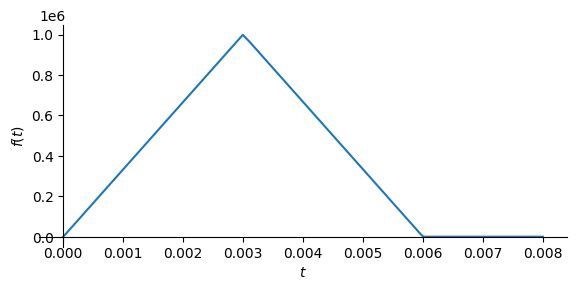

In [14]:
#| label: fig-lastfunktion
#| fig-cap: "Lastfunktion der kurzzeitig einwirkenden Stossbelastung"




F_1 = t*F_max / t_1 
F_2 =  F_1.subs(t,t_1)-((t-t_1)*F_max / t_1)
F_t = sp.Piecewise((F_1,t<t_1), (F_2,t<=t_2), (0, t>t_2))
sp.plot(F_t.subs(params_plot), (t,0,0.008), size=(5.9,3))
plt.show()

{{< pagebreak >}}

### Musterlösung{#sec-ml_log_dek}

#### Horizontale Steifigkeit

Für entsprechende Anwendungsfälle gibt es fertige Lösungen zur Bestimmung der Steifigkeit. Gemäss @fig-ems_rahmen_2 ist die Stütze am Fuss- und Kopfpunkt eingespannt. Somit resultiert die Steifigkeit zu:

$$
k_{Stuetze} = \frac{12EI_{Stuetze}}{H^3}
$${#eq-k_fur_stuetze}

Diese gilt für eine einzelne Stütze. Angewendet auf das Beispiel folgt die Systemsteifigkeit zu:


In [15]:
k = 2 * 12 * EI_stuetze / H**3

render.eq_display('k_', k,
                  'k_', k.subs(params).simplify().evalf(3))

    24⋅EI_stuetze
k = ─────────────
           3     
          H      

    2.1e+7⋅newton
k = ─────────────
        meter    

#### Eigenkreisfrequenz

In [16]:
omega_n = sp.sqrt(k/m)

render.eq_display('omega_n', 'sqrt(k/m)',
                  'omega_n', omega_n,
                  'omega_n', omega_n.subs(params).simplify().evalf(3))

         ___
        ╱ k 
ωₙ =   ╱  ─ 
     ╲╱   m 

               ____________
              ╱ EI_stuetze 
ωₙ = 2⋅√6⋅   ╱  ────────── 
            ╱       3      
          ╲╱       H ⋅m    

      64.8 
ωₙ = ──────
     second

#### Bewegungsgleichung

Die Bewegungsgleichung für einen ungedämpften Einmassenschwinger ist die folgende:

$$m u(t)'' + k u(t) = F(t)$$


##### Approximation der Lösung

Es handelt sich um eine inhomogene Differentialgleichung 2.Ordnung. Auf die exakte Lösung der Gleichung wird nicht eingegangen. Es wird versucht die bemessungsrelevanten Parameter näherungsweise zu bestimmen. Dies lässt sich mit dem Impulssatz approximieren. 

$$ F \Delta t = m \Delta v$$

Dieser besagt, dass die einwirkende Kraft $F$ im betrachteten Zeitabschnitt $\Delta t$ der Masse $m$ multipliziert mit der Geschwindigkeitsänderung $\Delta v$ des Objekts entspricht. Für eine kurze Anregung, wie im Beispiel der Fall ist, kann die Anfangsgeschwindigkeit wie folgt bestimmt werden:

$$ v_0 = \frac{I}{m}$$

$$I = \int_{0}^{t_2} F(t) \,dt $$

In [17]:
I = sp.integrate(F_t.subs(params), (t,0,t_2.subs(params)))
v_0 = I / m

## Die Anfangsgeschwindigkeit wird zum Params dict hinzugefügt
params['v_0'] = v_0.subs(params)
params_plot = convert.param_value(params)


render.eq_display('I_', I,
                  'v_0', v_0,
                  'v_0', v_0.subs(params))

I = 3000.0⋅newton⋅second

     3000.0⋅newton⋅second
v₀ = ────────────────────
              m          

     0.6⋅meter
v₀ = ─────────
       second 

Durch die Impuls-Betrachtung vereinfacht sich die Bewegungsgleichung zu:


$$
m u(t)'' + k u(t) = 0
$${#eq-bewegungsgleichung_homogen_ungedaempft}

Mit der Anfangsgeschwindigkeit als Randbedingung. 
$$
u'(t=0) = v_0  
$$
und der Startauslenkung:
$$
u(t=0) = u_0 = 0 
$$

Kann mittels der folgenden Ansatzfunktion die homogene Differentialgleichung gelöst werden:

$$
u(t) = A_1 \cos(\omega_n t) + A_2 \sin(\omega_n t)
$${#eq-ansatz_beweg}


In [18]:
A_1, A_2,u_0 = sp.symbols('A_1:3 u_0')

bewegungsgleichung = m*sp.diff(u,t,2) + k*u
ansatzfunktion = sp.Eq(u,A_1 * sp.cos(omega_n*t) + A_2*sp.sin(omega_n*t))
eq_randbedingung_1 = sp.Eq(u_0,ansatzfunktion.rhs.subs(t,0))
eq_randbedingung_2 = sp.Eq(v_0, sp.diff(ansatzfunktion.rhs,t).subs(t,0))
A_solve = sp.solve([eq_randbedingung_1, eq_randbedingung_2],[A_1, A_2],dict=True)[0]


u_t = ansatzfunktion.subs(A_solve)
u_t.subs(params).simplify().evalf(3)


                  ⎛64.8362038781832⋅t⎞      
u(t) = 0.00925⋅sin⎜──────────────────⎟⋅meter
                  ⎝      second      ⎠      

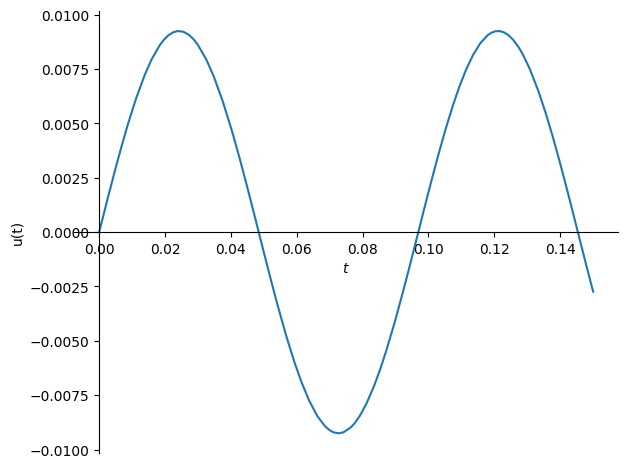

In [19]:
#| label: fig-bewegungsfunk
#| fig-cap: "Zeitlicher Verlauf der Auslenkung"

u_t_plot = u_t.subs(params_plot).rhs/unit.N/unit.second
sp.plot(u_t_plot, (t,0,0.15), ylabel='u(t)')

plt.show()


#### Rückstellkraft

Anhand der maximalen Amplitude lässt sich die maximale Rückstellkraft für den gesamten Rahmen bestimmen.

$$F_R = k   u = k   A$$



In [20]:
t_max = sp.solve(sp.Eq(sp.diff(u_t.rhs,t),0),t)
u_max = u_t.subs(t, t_max[0].subs(params_plot)*unit.second).subs(params).rhs

F_R = k * u_max

render.eq_display('u_max', 'A',
                  'A', u_max.simplify().evalf(3),
                  'F_R', F_R.subs(params).simplify().evalf(3))

uₘₐₓ = A

A = 0.00925⋅meter

F_R = 1.95e+5⋅newton

##### Spannungsnachweis

Die Rückstellkraft wirkt im Zentrum der Masse und bewirkt das maximale Biegemoment bei den Fusspunkten.

![Biegemomentenverlauf durch die statische Ersatzkraft](bilder/impulssatz_momentenverlauf.pdf)

In [23]:
M_max = F_R/2 * H * sp.Rational(0.5)

sigma_max = M_max /W_el_y

render.eq_display('M_max', 'F_R /2 * H * Rational(0.5)',
                  'M_max', M_max.subs(params).simplify().evalf(3),
                  'sigma_max', 'M_max / W_el_y',
                  'sigma_max', unit.convert_to(sigma_max.subs(params).simplify().evalf(3), unit.mm),
                  'Nachweis', unit.convert_to(sigma_max.subs(params).simplify().evalf(3), unit.mm)<f_y)

       F_R⋅H
Mₘₐₓ = ─────
         4  

Mₘₐₓ = 1.46e+5⋅meter⋅newton

        Mₘₐₓ 
σₘₐₓ = ──────
       W_el_y

       156.0⋅newton
σₘₐₓ = ────────────
                 2 
       millimeter  

           156.0⋅newton      
Nachweis = ──────────── < f_y
                     2       
           millimeter        

In [ ]:
## Beispiel: 